In [ ]:
import onnxruntime as ort
import numpy as np
import inference_utils as utils

# Load the ONNX model

trafficcamnet_prunned_path = "models/trafficcamnet_pruned_onnx_v1.0.4/resnet18_trafficcamnet_pruned.onnx"
dash_path = "models/dashcamnet_pruned_onnx_v1.0.5/resnet18_dashcamnet_pruned.onnx"


session = ort.InferenceSession(dash_path)
# Get model input and output names
input_name = session.get_inputs()[0].name
output_names = [output.name for output in session.get_outputs()]

# Print output info for debugging
for i, output in enumerate(session.get_outputs()):
    print(f"Output {i}: {output.name}, Shape: {output.shape}")

# Prepare input data
# This depends on your model's expected input shape and type
image_path = "images/image2.png"
input_image = utils.image_to_tensor(image_path)
# Run inference
outputs = session.run(output_names, {input_name: input_image})

Output 0: output_cov/Sigmoid:0, Shape: ['unk__151', 4, 34, 60]
Output 1: output_bbox/BiasAdd:0, Shape: ['unk__152', 16, 34, 60]


(2040, 4)
(2040, 16)
Number of clusters: 3
Number of noise points: 1895


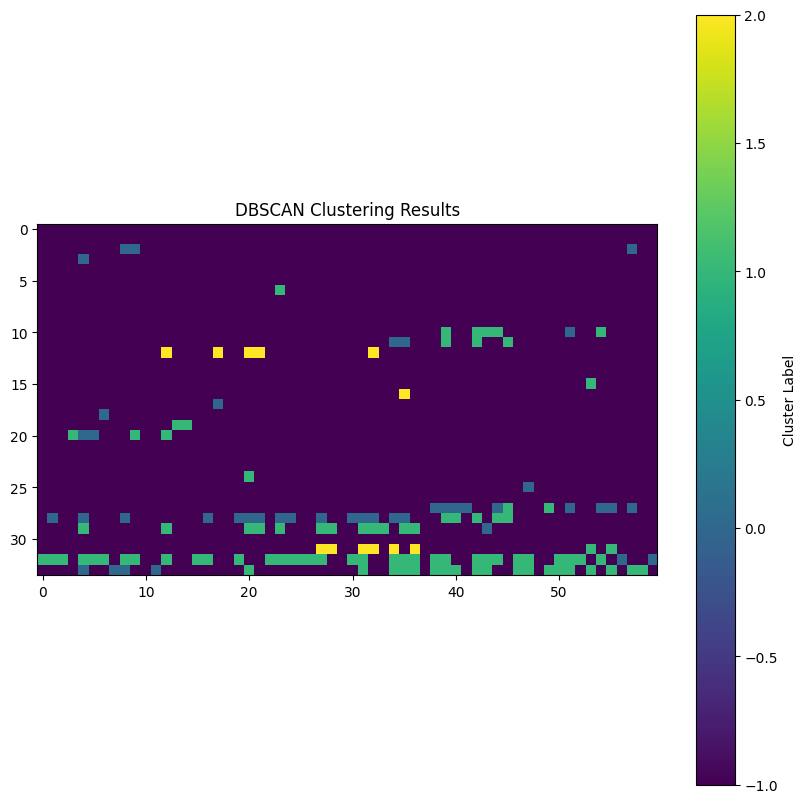

In [20]:
import importlib
importlib.reload(utils)
cov,bbox = outputs[0][0], outputs[1][0]
labels, labels_2d, clustered_data = utils.apply_dbscan_to_vision_output(cov,bbox)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {list(labels).count(-1)}")

# Visualize the clusters
utils.visualize_clusters(labels_2d)

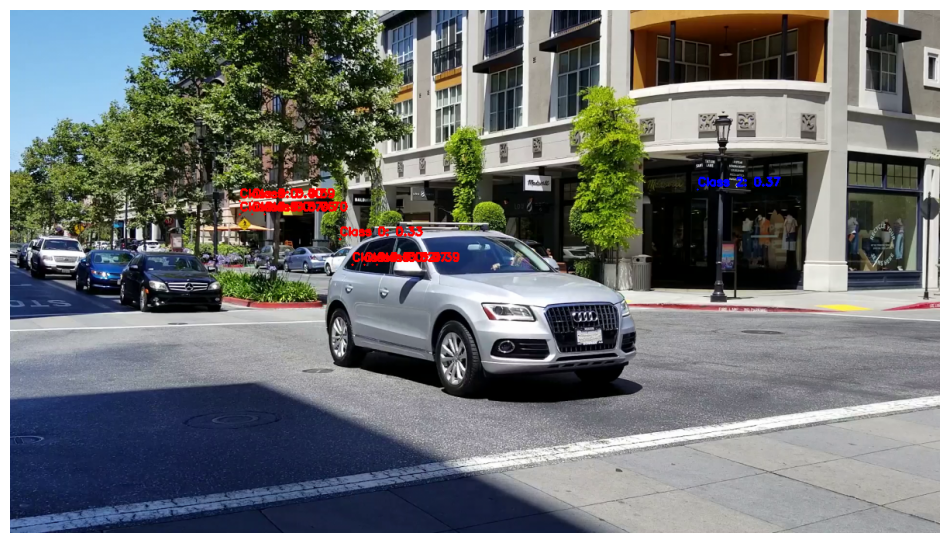

In [ ]:
import importlib
importlib.reload(utils)
import cv2

cv2image = cv2.imread(image_path)
detections = utils.process_model_outputs(outputs[0][0], outputs[1][0],input_image.shape[2:],confidence_threshold=0.3)
annotated_image = utils.visualize_detections(cv2image,detections)

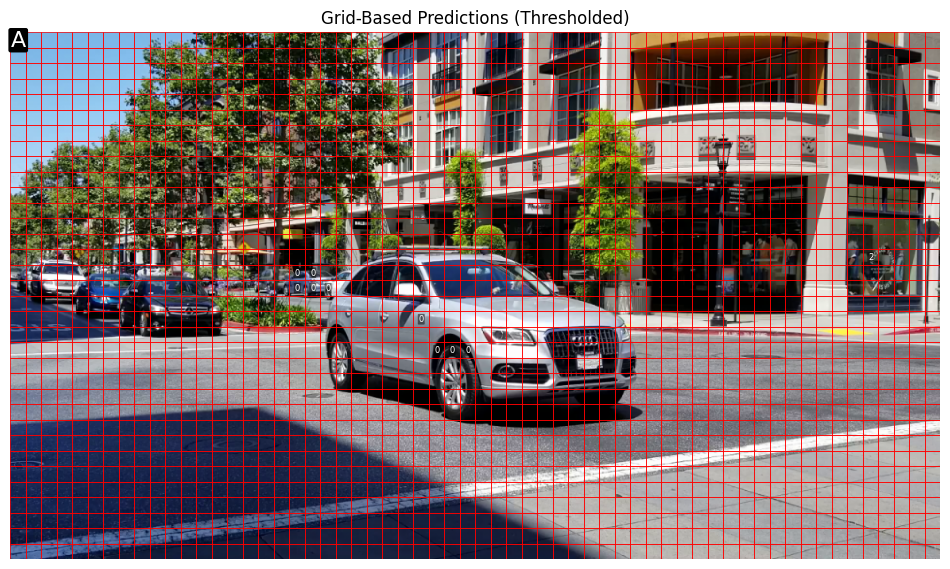

In [48]:
import importlib
importlib.reload(utils)
utils.visualize_predictions_grid(image_path,outputs[0][0],confidence_threshold=0.3)